# Frame Classification using ResNet + LSTM

- Create the LSTM model
- Cross validate the model using different hyperparameters configurations
- Train the best model
- Evaluate the best model within the testing videos

In [1]:
from utils2 import *
import os

/Users/saraalbarran/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-11-27 09:14:54,192	INFO util.py:159 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2023-11-27 09:14:54,260	INFO util.py:159 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


## Train models

We will use the best configuration we found with our wandb project

In [2]:
best_config = {
    'abs_path': '/Users/saraalbarran/Jupyterfiles/Uni/_ratolins/code2/', # project path 
    'sequence_length': 300, 
    'backbone': 'resnet',
    'layers': 'lstm',
    'dropout_rate': 0.5,
    'num_layers': 3,
    'num_units': 128,
    'loss': 'binary_crossentropy',
    'optimizer': 'adam',
    'learning_rate': 0.001,
    'epochs': 50,
    'batch_size': 8,
    'es_monitor': 'val_prc',
    'es_mode': 'max',
    'es_patience': 5,
}

## Final model Training & Evaluation

(264, 300, 2048) (264, 300, 3)
(110, 300, 2048) (110, 300, 3)
Running experiment for Grooming

Epoch 1: loss improved from inf to 0.42965, saving model to resnet_lstm_accuracy_grooming.h5


/Users/saraalbarran/miniconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: loss improved from 0.42965 to 0.23524, saving model to resnet_lstm_accuracy_grooming.h5

Epoch 3: loss improved from 0.23524 to 0.18700, saving model to resnet_lstm_accuracy_grooming.h5

Epoch 4: loss improved from 0.18700 to 0.17193, saving model to resnet_lstm_accuracy_grooming.h5

Epoch 5: loss improved from 0.17193 to 0.17154, saving model to resnet_lstm_accuracy_grooming.h5

Epoch 6: loss improved from 0.17154 to 0.15336, saving model to resnet_lstm_accuracy_grooming.h5

Epoch 7: loss did not improve from 0.15336

Epoch 8: loss improved from 0.15336 to 0.14590, saving model to resnet_lstm_accuracy_grooming.h5

Epoch 9: loss did not improve from 0.14590

Epoch 10: loss did not improve from 0.14590

Epoch 11: loss did not improve from 0.14590

Epoch 12: loss did not improve from 0.14590

Epoch 13: loss improved from 0.14590 to 0.13464, saving model to resnet_lstm_accuracy_grooming.h5

Epoch 14: loss improved from 0.13464 to 0.11337, saving model to resnet_lstm_accuracy_gro

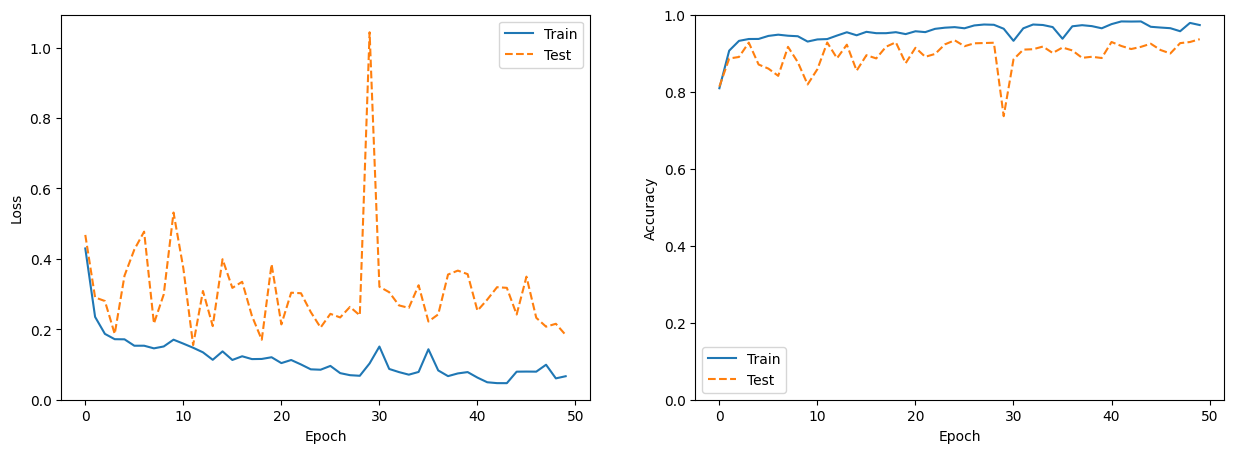

14/14 [==============================] - 2s 135ms/step


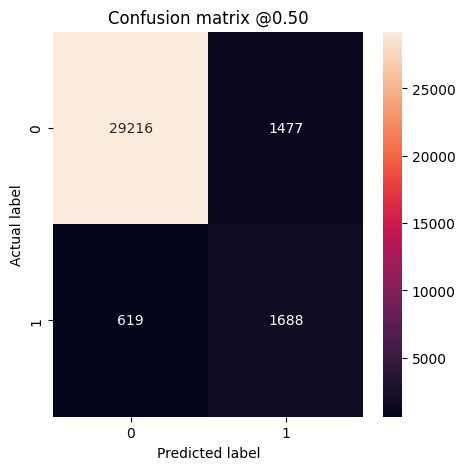

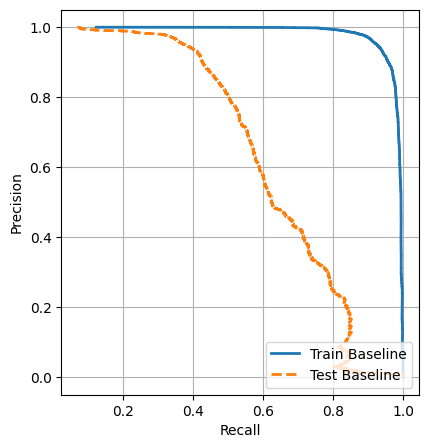

/Users/saraalbarran/Jupyterfiles/Uni/ratolins/AutomatedMouseBehaviorRecognition/notebooks/utils2.py:341: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_metrics = pd.concat([


Running experiment for Rearing

Epoch 1: loss improved from inf to 0.60090, saving model to resnet_lstm_accuracy_rearing.h5


/Users/saraalbarran/miniconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: loss improved from 0.60090 to 0.46458, saving model to resnet_lstm_accuracy_rearing.h5

Epoch 3: loss did not improve from 0.46458

Epoch 4: loss improved from 0.46458 to 0.37857, saving model to resnet_lstm_accuracy_rearing.h5

Epoch 5: loss improved from 0.37857 to 0.37397, saving model to resnet_lstm_accuracy_rearing.h5

Epoch 6: loss improved from 0.37397 to 0.35674, saving model to resnet_lstm_accuracy_rearing.h5

Epoch 7: loss improved from 0.35674 to 0.33300, saving model to resnet_lstm_accuracy_rearing.h5

Epoch 8: loss did not improve from 0.33300

Epoch 9: loss improved from 0.33300 to 0.31647, saving model to resnet_lstm_accuracy_rearing.h5

Epoch 10: loss improved from 0.31647 to 0.30058, saving model to resnet_lstm_accuracy_rearing.h5

Epoch 11: loss improved from 0.30058 to 0.28469, saving model to resnet_lstm_accuracy_rearing.h5

Epoch 12: loss did not improve from 0.28469

Epoch 13: loss did not improve from 0.28469

Epoch 14: loss improved from 0.28469 to 0.2

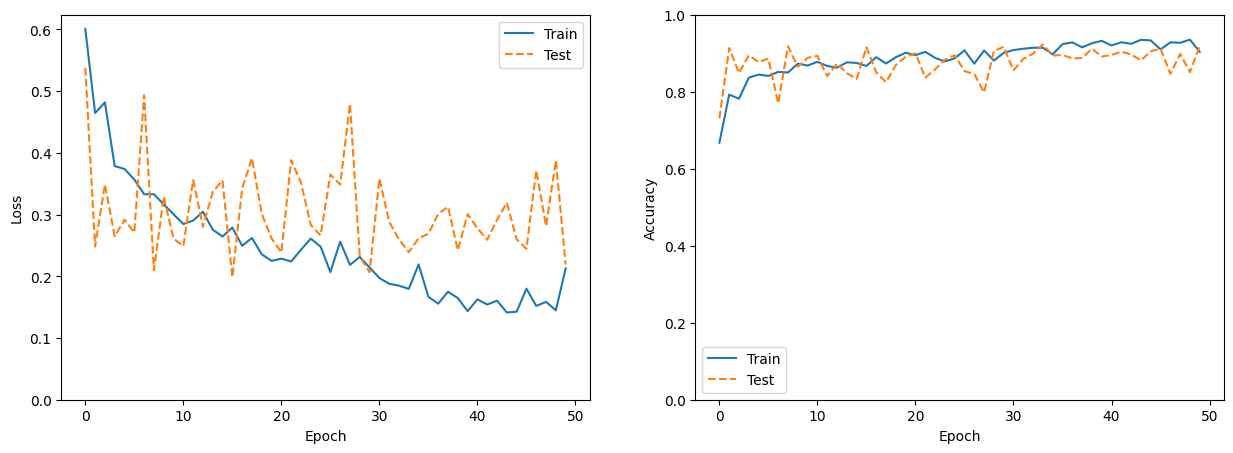

14/14 [==============================] - 2s 138ms/step


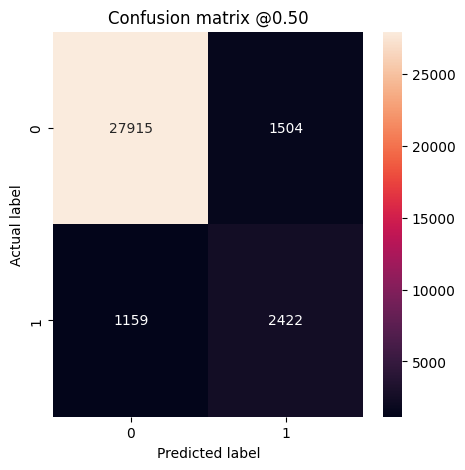

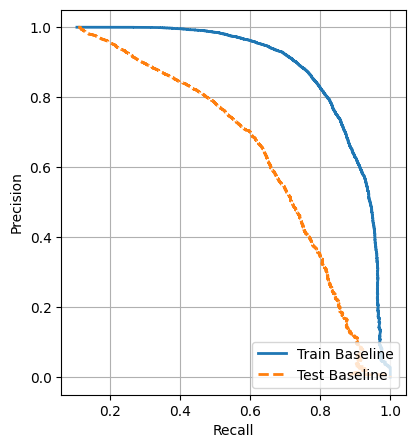

IndexError: list index out of range

In [3]:
metrics = train_test_model(best_config)